# Data Analysis

This notebook provides functions for reading in conll structures with pandas and provide basic insights regarding distributions and classes.

I did not clear this notebook, since the content is indicative of my work process. But it can be cleared and rerun, of course.

In [1]:
import pandas as pd
import seaborn as sns

In [16]:
# data analysis functions 

def get_annotations(inputdata, annotationcolumn):
    '''
    get a list of all categories of tags in the inputfile
    
    :param inputdata: a dataframe with the conll2003 training data
    :param annotationcolumn: the name of the column containing the gold annotations
    :type inputdata: pandas.core.frame.DataFrame
    :type annotationcolumn: string
    
    returns a unique list of the labels
    '''
    annotations = inputdata[annotationcolumn].tolist()
    unique_annotations = list(set(annotations))
    
    return unique_annotations

def get_instances_per_tag(inputdata, wordcolumn, annotationcolumn):
    '''
    creates a dictionary with keys as the annotations and values as lists containing all instances of each tag
    
    :param inputdata: a dataframe with the conll2003 training data
    :param wordcolumn: the name of the column containing the tokens
    :param annotationcolumn: the name of the column containing the gold annotations
    :type inputdata: pandas.core.frame.DataFrame
    :type wordcolumn: string
    :type annotationcolumn: string
    
    returns dictionary with lists as values
    '''
    instances_per_tag = {}
    
    for pair in zip(inputdata[wordcolumn],inputdata[annotationcolumn]):
        
        if pair[1] not in instances_per_tag:
            instances_per_tag[pair[1]] = [pair[0]]
        else:
            instances_per_tag[pair[1]].append(pair[0])
            
    return instances_per_tag        
        
def get_words_per_tag(instances_per_tag):
    '''
    create words_per_tag dict of dicts where duplicate words are not counted, but word frequency is added
    the dictionary values contains unique instances as keys, and integers representing frequency as values
    
    :param instances_per_tag: dictionary with labels as keys and list of corresponding instances as values
    :type instances_per_tag: dict
    
    returns dictionary with dictionaries as values
    '''
    words_per_tag = {}
    
    for key in instances_per_tag:
        words_per_tag[key] = {}
        
        for word in instances_per_tag[key]:
            
            if word not in words_per_tag[key].keys():
                words_per_tag[key][word] = 1
            else:
                words_per_tag[key][word] += 1
                
    return words_per_tag

def get_most_frequent_word(tag, words_per_tag):
    '''
    gets the most frequent word per category   
    
    :param tag: name of label
    :param words_per_tag: word frequency dictionary
    :type tag: string
    :type words_per_tag: dictionary of dictionaries
    
    returns the most frequent word
    '''
    check_in = words_per_tag[tag]
    max_value = max(check_in, key=check_in.get)
    
    return max_value
    
def get_most_frequent_words(tag, words_per_tag, threshold):
    '''
    returns a dictionary containing the most frequent words above threshold per given category
    the dictionary values contains unique instances as keys, and integers representing frequency as values
    
    :param tag: name of label
    :param words_per_tag: word frequency dictionary
    :param threshold: integer
    :type tag: string
    :type words_per_tag: dict of dicts
    :type threshold: integer
    
    returns dictionary with dictionaries as values 
    '''
    most_frequent_words = {}
    
    for word in words_per_tag[tag]:
        
        if words_per_tag[tag][word] > threshold:
            most_frequent_words[word] = words_per_tag[tag][word]
            
    return most_frequent_words

## Printing the information retreived from the CONLL file

I used these functions to confuct an initial analysis of the data, look at the majority class and other significant classes, and understand the patterns occurring within each class. This analysis helped me in the preprocessing stage and inspired some of my features.

list of labels: ['B-PER', 'O', 'I-PER', 'B-MISC', 'B-LOC', 'I-LOC', 'I-ORG', 'I-MISC', 'B-ORG'] 

class: B-ORG
number of instances per class: 6321
class: O
number of instances per class: 167397
class: B-MISC
number of instances per class: 3438
class: B-PER
number of instances per class: 6600
class: I-PER
number of instances per class: 4528
class: B-LOC
number of instances per class: 7140
class: I-ORG
number of instances per class: 3704
class: I-MISC
number of instances per class: 1155
class: I-LOC
number of instances per class: 1157

B-PER {'Peter': 31, 'John': 49, 'David': 50, 'Netanyahu': 16, 'Arafat': 35, 'Yasser': 12, 'Paul': 50, 'Steve': 23, 'Mark': 58, 'Tim': 15, 'Mickelson': 11, 'Greg': 14, 'Scott': 18, 'Alexander': 23, 'Tom': 15, 'Craig': 14, 'Jim': 21, 'Wayne': 17, 'George': 14, 'Chris': 19, 'Jason': 14, 'Arantxa': 11, 'Michael': 55, 'Martin': 25, 'D.': 21, 'S.': 15, 'G.': 23, 'M.': 46, 'J.': 15, 'A.': 32, 'P.': 18, 'N.': 20, 'C.': 16, 'Waqar': 28, 'Mushtaq': 25, 'Saeed': 18, 

<AxesSubplot: xlabel='Gold', ylabel='count'>

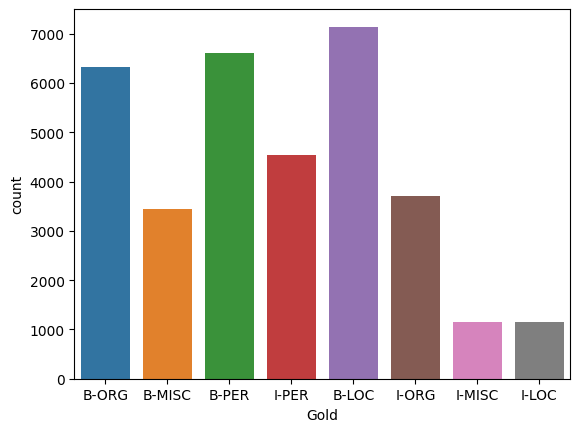

In [19]:
inputfile = '../data/conll2003.train.conll'

conll_input = pd.read_csv(inputfile, sep='\t',names=['Token','POS','Chunk','Gold'])
conll_input = conll_input.dropna() # drop rows that contains nan values
        
instances_per_tag = get_instances_per_tag(conll_input,'Token','Gold')
words_per_tag = get_words_per_tag(instances_per_tag)
annotations = get_annotations(conll_input,'Gold')

print('list of labels:',annotations,'\n')

# print class and number of instances per class
for key in instances_per_tag:
    
    print("class:", key) 
    print("number of instances per class:", len(instances_per_tag[key]))

print()
# print tag, most frequent words and the most frequent word
for annotation in annotations:
    
    if annotation != 'O':
        most_frequent_word = get_most_frequent_word(annotation,words_per_tag)
        most_frequent_words = get_most_frequent_words(annotation,words_per_tag,10)
    
        print(annotation, most_frequent_words, most_frequent_word, '\n')

# print distribution table, excluding O
exclude_O = conll_input.drop(conll_input[conll_input['Gold'] == 'O'].index)
sns.countplot(x=exclude_O['Gold'])